<a href="https://colab.research.google.com/github/JussiKoo/deep_learning/blob/main/Meeting2Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Understanding Neural Networks in PyTorch**
- Neural networks are composed of **layers** that process inputs and generate outputs.
- PyTorch provides high-level abstractions to build and manage these layers efficiently.
- Key Concepts:  
  - Layers in Neural Networks  
  - Modules and Abstraction  
  - Model Construction Techniques


## **2. Layers in Neural Networks**
- Initially, neural networks consisted of a **single neuron** taking inputs, processing, and producing outputs.
- Modern networks contain multiple layers, such as:
  - Input Layer
  - Hidden Layers (e.g., ReLU activations)
  - Output Layer
- Layers contain **trainable parameters** that get updated during learning.

### **Diagram Example:**
![Neural Network](https://upload.wikimedia.org/wikipedia/commons/e/e4/Artificial_neural_network.svg)


## **3. PyTorch Modules: Building Blocks of Deep Learning**
- PyTorch introduces the `Module` class to encapsulate network components.
- A module can represent:
  - A single layer (e.g., a fully connected layer).
  - A collection of layers.
  - An entire neural network.

### **Example Code:**
```python
import torch.nn as nn
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(28*28, 128)
    def forward(self, x):
        return self.layer1(x)


## 4. Building Models Using nn.Sequential

- `nn.Sequential` allows for easy stacking of layers in an ordered fashion.
- The output of one layer is passed directly to the next.
- Example model structure using `Sequential`:

### Example Code:
```python
import torch.nn as nn
net = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)


## 5. Creating Custom Models Using nn.Module

- Custom models can be built by subclassing `nn.Module`.
- The `__init__` method defines layers.
- The `forward` method specifies how data flows through the model.

### Example Code:
```python
import torch.nn as nn
import torch

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 128)
        self.out = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        return self.out(x)


## **6. Why Use PyTorch Modules?**

- **Flexibility:** Allows easy customization and extension.
- **Code Reusability:** Modular design supports reusing components across models.
- **Automatic Management:** Handles parameters and backpropagation efficiently.
- **Scalability:** Suitable for large architectures like ResNet.


## 7. Modules for Large-Scale Models

- Complex architectures like ResNet use modular components.
- Layers are arranged in repeating blocks for efficiency.
- Modularization simplifies model management.

### Diagram Example:
![ResNet](https://upload.wikimedia.org/wikipedia/commons/0/02/ResNet34.png)


## **8. Summary**
- **Layers** process data sequentially and contain trainable parameters.
- **Modules** provide a high-level abstraction to group layers efficiently.
- PyTorch offers flexibility through `nn.Sequential` and custom `nn.Module` subclassing.
- Understanding these concepts is essential for scalable and maintainable model development.


## **9. Hands-on Exercise**
**Task:**  
- Implement a simple MLP in PyTorch using `Sequential` and `Module`.
- Sample dataset: MNIST.
- Evaluate accuracy and visualize predictions.


## **10. Questions and Discussion**
- Any doubts?
- Further reading suggestions:
  - PyTorch official documentation: https://pytorch.org/docs/stable/nn.html
  - Hands-on tutorials with Colab: https://colab.research.google.com/github/pytorch/tutorials

- PyTorch tutorials: https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html

Colab TUtorials: https://colab.research.google.com/notebooks/intro.ipynb


## Example: Steps for MNIST Classification:

1. **Import required libraries.**  
   - Import necessary PyTorch and visualization libraries.

2. **Load and preprocess the MNIST dataset.**  
   - Download the dataset using `torchvision.datasets` and apply transformations.

3. **Define a simple feedforward neural network.**  
   - Create an `nn.Module` subclass to define layers and the forward pass.

4. **Set up loss function and optimizer.**  
   - Use `CrossEntropyLoss` for classification and `Adam` optimizer.

5. **Train the model for a few epochs.**  
   - Iterate through the dataset using the data loader and update weights.

6. **Evaluate performance on test data.**  
   - Compute accuracy by comparing predictions with true labels.

7. **Visualize predictions.**  
   - Display some sample images with their predicted labels.

8. **Save and load the model for future use.**  
   - Use `torch.save()` to store model weights and `torch.load()` to restore them.


In [ ]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import utils
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import ConcatDataset

import torch.nn.functional as F
import torch.optim as optim

import torchvision

import matplotlib

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

#train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

100%|██████████| 170M/170M [00:02<00:00, 61.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
x = torch.stack([sample[0] for sample in ConcatDataset([train])])
mean = torch.mean(x, dim=(0,2,3))
std = torch.std(x, dim=(0,2,3))

In [ ]:
print(x.shape)
print(mean)
print(std)

x = x.view(x.size(0), -1)

torch.Size([50000, 3, 32, 32])
tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

train = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_dataloader = DataLoader(train, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test, batch_size=128, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [114]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(3*32*32, 512)
        self.hidden2 = nn.Linear(512, 256)
        self.hidden3 = nn.Linear(256, 128)
        self.out = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1,32*32*3)
        x = torch.relu(self.hidden(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.out(x)
        return x

automobile   cat   cat horse horse   cat truck horse


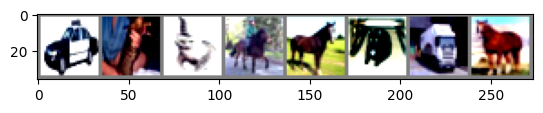

In [115]:
classes = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

def imshow(img):
    img = img/2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

images, labels = images[0:8], labels[0:8]

# show images
imshow(utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [116]:
mlp = MLP()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.0001)

In [117]:
for epoch in range(3):
  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    outputs = mlp(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i % 100 == 99:
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
      running_loss = 0.0
print("Training finished")

[1,   100] loss: 2.005
[1,   200] loss: 1.746
[1,   300] loss: 1.639
[2,   100] loss: 1.551
[2,   200] loss: 1.490
[2,   300] loss: 1.478
[3,   100] loss: 1.402
[3,   200] loss: 1.400
[3,   300] loss: 1.384
Training finished


In [118]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    images = images.view(images.size(0), -1)
    outputs = mlp(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 50 %


truck  deer airplane  frog  ship  frog airplane airplane
 deer airplane airplane  frog  ship  frog truck airplane
0.4084 0.2648 0.5525 0.4925 0.5571 0.2239 0.3563 0.2987


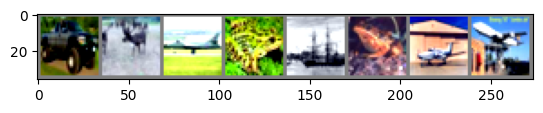

In [134]:
#from google.colab import drive

#drive.mount('/content/drive')

def imshow(img):
    img = img/2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random test images
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

images, labels = images[0:8], labels[0:8]

predictions = mlp(images.view(images.size(0), -1))

probs = F.softmax(predictions, dim=1)

max_probs = torch.max(probs, dim=1)

_, predicted = torch.max(predictions.data, 1)

# show images
imshow(utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

#print predictions
print(' '.join('%5s' % classes[predicted[j]] for j in range(8)))

#print confidences
print(' '.join(f'{prob:.4f}' for prob in max_probs.values[:8]))